In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px

In [6]:
data = "/content/traffic_accidents_india-2016-18.csv"
df = pd.read_csv(data)
df.head(10)

,City,Total Registered Motor Vehicles (as of 2016),Year,Accident type,Pedestrian,Bicycles,Two-wheelers,"Other modes of road transport (auto, bus, lorry)",Total
0,Ahmedabad,3656000,2016,Injuries,606.0,76.0,787.0,231.0,315
1,Ahmedabad,3656000,2016,Fatalities,125.0,11.0,96.0,83.0,315
2,Ahmedabad,3656000,2017,Injuries,484.0,48.0,544.0,214.0,1290
3,Ahmedabad,3656000,2017,Fatalities,126.0,15.0,71.0,82.0,294
4,Ahmedabad,3656000,2018,Injuries,558.0,58.0,653.0,256.0,1525
5,Ahmedabad,3656000,2018,Fatalities,132.0,14.0,110.0,64.0,320
6,Bangalore,6113000,2016,Injuries,571.0,34.0,1848.0,1811.0,4264
7,Bangalore,6113000,2016,Fatalities,215.0,7.0,374.0,239.0,835
8,Bangalore,6113000,2017,Injuries,1346.0,31.0,1499.0,1380.0,4256
9,Bangalore,6113000,2017,Fatalities,284.0,8.0,98.0,252.0,642


In [9]:
df.columns

Index(['City', 'Total Registered Motor Vehicles (as of 2016)', 'Year',
       'Accident type', 'Pedestrian', 'Bicycles', 'Two-wheelers',
       'Other modes of road transport (auto, bus, lorry)', 'Total'],
      dtype='object')

In [10]:
print("Number of columns: ",len(df.columns))
print("Number of rows: ",len(df))

Number of columns:  9
Number of rows:  48


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 9 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   City                                              48 non-null     object 
 1   Total Registered Motor Vehicles (as of 2016)      48 non-null     int64  
 2   Year                                              48 non-null     int64  
 3   Accident type                                     48 non-null     object 
 4   Pedestrian                                        40 non-null     float64
 5   Bicycles                                          40 non-null     float64
 6   Two-wheelers                                      46 non-null     float64
 7   Other modes of road transport (auto, bus, lorry)  46 non-null     float64
 8   Total                                             48 non-null     int64  
dtypes: float64(4), int64(3),

In [12]:
df.describe()

,Total Registered Motor Vehicles (as of 2016),Year,Pedestrian,Bicycles,Two-wheelers,"Other modes of road transport (auto, bus, lorry)",Total
count,4.800000e+01,48.000000,40.000000,40.000000,46.000000,46.000000,48.000000
mean,2.678875e+06,2017.000000,455.075000,120.250000,1168.195652,1006.456522,4173.416667
std,1.883256e+06,0.825137,500.012174,294.982377,1917.335566,1732.872396,7535.220385
min,7.830000e+05,2016.000000,32.000000,1.000000,40.000000,12.000000,98.000000
25%,1.315500e+06,2016.000000,125.750000,12.000000,136.250000,82.250000,315.000000
50%,1.814500e+06,2017.000000,245.500000,25.500000,387.000000,254.000000,1061.000000
75%,3.976500e+06,2018.000000,561.250000,50.500000,1200.500000,686.250000,4160.750000
max,6.113000e+06,2018.000000,1863.000000,1498.000000,7754.000000,7345.000000,29664.000000


In [13]:
len(df.select_dtypes(['int64', 'float64']).columns)

7

In [14]:
df.isnull().sum()

City                                                0
Total Registered Motor Vehicles (as of 2016)        0
Year                                                0
Accident type                                       0
Pedestrian                                          8
Bicycles                                            8
Two-wheelers                                        2
Other modes of road transport (auto, bus, lorry)    2
Total                                               0
dtype: int64

In [15]:
df.isna().sum()

City                                                0
Total Registered Motor Vehicles (as of 2016)        0
Year                                                0
Accident type                                       0
Pedestrian                                          8
Bicycles                                            8
Two-wheelers                                        2
Other modes of road transport (auto, bus, lorry)    2
Total                                               0
dtype: int64

In [16]:
df.isna().sum().sort_values(ascending=False) * 100. / len(df)

Pedestrian                                          16.666667
Bicycles                                            16.666667
Two-wheelers                                         4.166667
Other modes of road transport (auto, bus, lorry)     4.166667
City                                                 0.000000
Total Registered Motor Vehicles (as of 2016)         0.000000
Year                                                 0.000000
Accident type                                        0.000000
Total                                                0.000000
dtype: float64

In [17]:
missing_data = df.isna().sum().sort_values(ascending=False) * 100. / len(df)

In [20]:
type(missing_data)


pandas.core.series.Series

<Axes: >

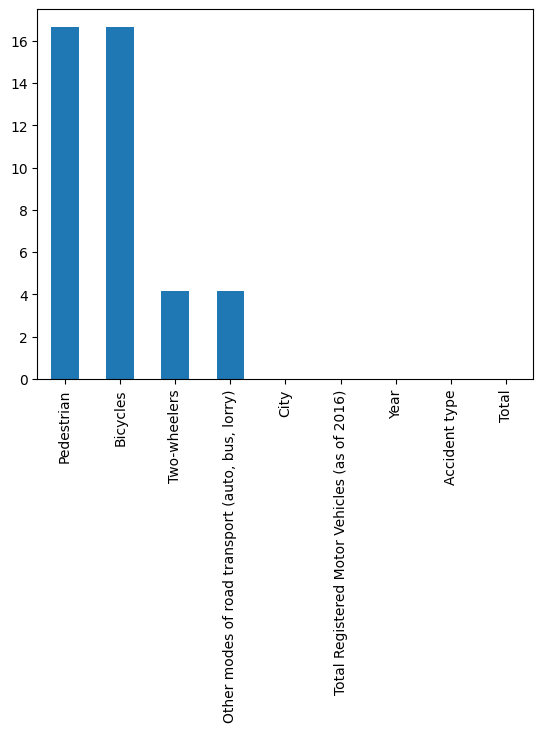

In [21]:

missing_data.plot(kind='bar')

<Axes: >

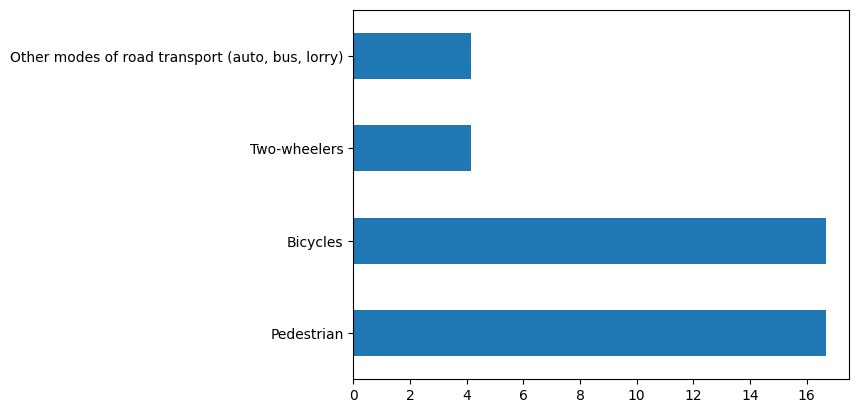

In [22]:

missing_data[missing_data!=0].plot(kind='barh')

In [23]:
df.columns

Index(['City', 'Total Registered Motor Vehicles (as of 2016)', 'Year',
       'Accident type', 'Pedestrian', 'Bicycles', 'Two-wheelers',
       'Other modes of road transport (auto, bus, lorry)', 'Total'],
      dtype='object')

In [24]:
df.City.unique()

array(['Ahmedabad', 'Bangalore', 'Chandigarh', 'Chennai', 'Indore',
       'Lucknow', 'Nagpur', 'Visakhapatnam'], dtype=object)

In [25]:
cities = df.City.unique()
len(cities)

8

In [26]:
cities_by_accident = df.City.value_counts()
cities_by_accident[:20]

City
Ahmedabad        6
Bangalore        6
Chandigarh       6
Chennai          6
Indore           6
Lucknow          6
Nagpur           6
Visakhapatnam    6
Name: count, dtype: int64

In [29]:
'Lucknow' in cities

True

In [30]:
cities_by_accident["Lucknow"]

6

<Axes: ylabel='City'>

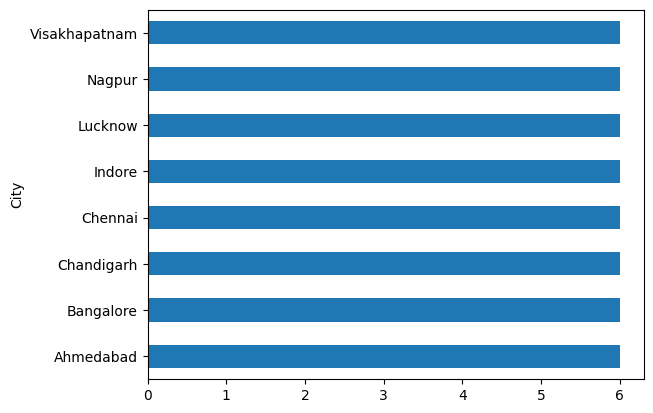

In [32]:
cities_by_accident[:20].plot(kind='barh')

In [33]:
import seaborn as sns
sns.set_style("darkgrid")

<ipython-input-36-1f460903cad6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cities_by_accident)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='count', ylabel='Density'>

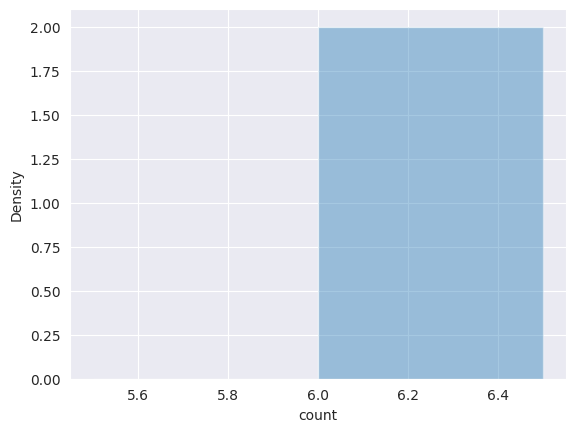

In [36]:
sns.distplot(cities_by_accident)

In [37]:
high_accident_cities = cities_by_accident[cities_by_accident >=1000] # having over 1000 accidents
low_accident_cities = cities_by_accident[cities_by_accident < 1000]

In [38]:

# Percentage of high accident cities
len(high_accident_cities) / len(cities_by_accident)

0.0

<ipython-input-39-50976d58a416>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(high_accident_cities)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2464: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.10/dist-packages/numpy/lib/histograms.py:885: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


<Axes: xlabel='count'>

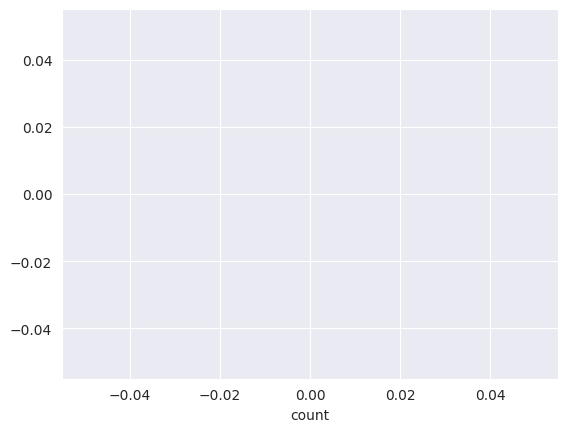

In [39]:
sns.distplot(high_accident_cities)

<ipython-input-40-a69b07a78e7c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(low_accident_cities)
/usr/local/lib/python3.10/dist-packages/seaborn/distributions.py:2496: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  kdeplot(**{axis: a}, ax=ax, color=kde_color, **kde_kws)


<Axes: xlabel='count', ylabel='Density'>

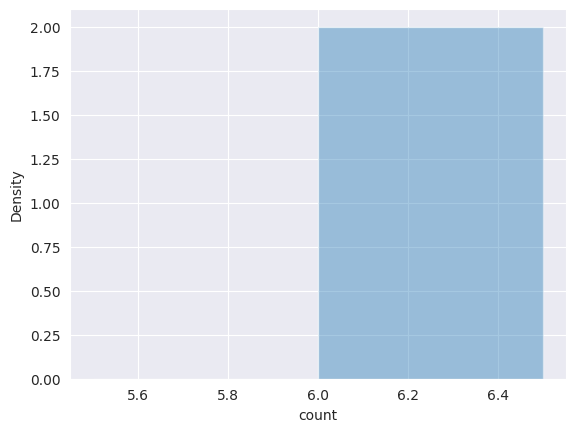

In [40]:
sns.distplot(low_accident_cities)

<Axes: xlabel='count', ylabel='Count'>

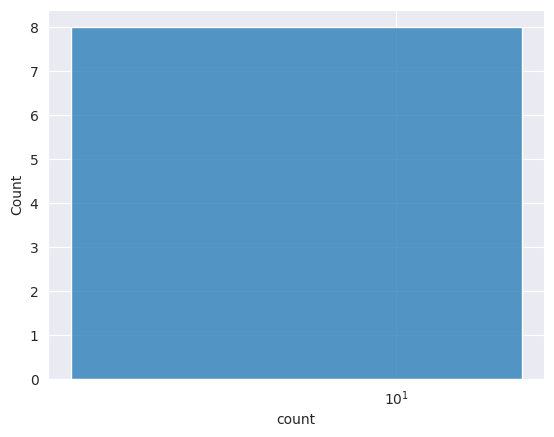

In [41]:
sns.histplot(low_accident_cities, log_scale=True)

<Axes: >

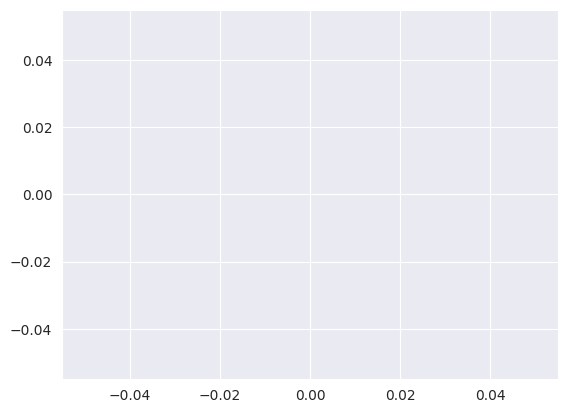

In [42]:
sns.histplot(high_accident_cities, log_scale=True)

In [43]:
cities_by_accident[cities_by_accident == 1]

Series([], Name: count, dtype: int64)